In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Data Collection and Analysis

In [2]:
customer_data=pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customer_data.shape

(200, 5)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
pd.isnull(customer_data).sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
# cluster on 2 features
df1 = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


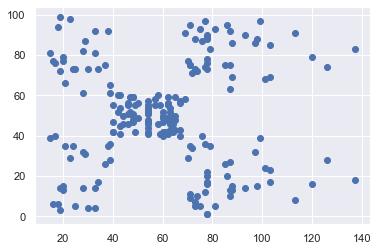

In [38]:
# scatter plot
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])


# Choosing Annual Income columns and Score Columns

In [4]:
X=customer_data.iloc[:,[3,4]].values

# Choose Correct Number of Clusters

In [5]:
import warnings
warnings.filterwarnings('ignore')

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

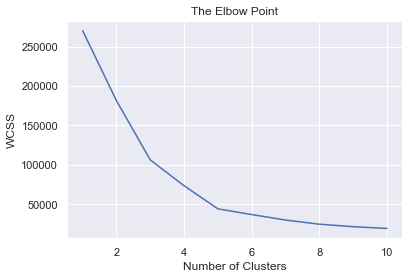

In [6]:
import matplotlib.pyplot as plt
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Optimum Number of Clusters is Five

In [7]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
Y=kmeans.fit_predict(X)

In [15]:
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visulize Clusters

Text(0, 0.5, 'Spending Score')

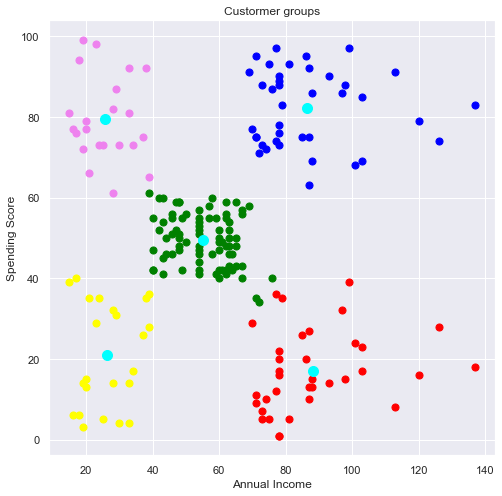

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50,c='violet',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50,c='blue',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Custormer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [10]:
from collections import Counter
Counter(Y)

Counter({2: 23, 3: 22, 0: 81, 4: 39, 1: 35})

In [21]:
Y.shape

(200,)

In [28]:
customer_data['Label']=Y

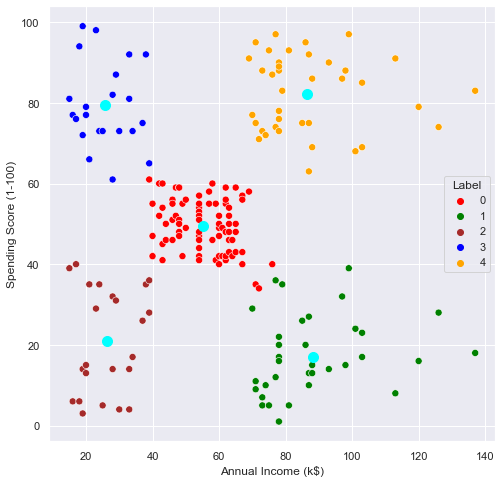

In [31]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_data, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

In [ ]:
customer

# Dendogram

Text(0, 0.5, 'Distance')

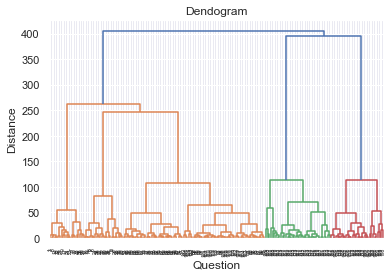

In [11]:
import scipy.cluster.hierarchy as hier
dendogram = hier.dendrogram(hier.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Question')
plt.ylabel('Distance')

# Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Y = model.fit_predict(X)

Text(0, 0.5, 'Spending Score')

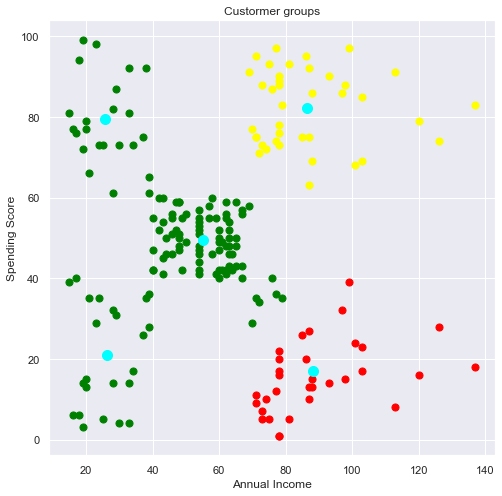

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50,c='yellow',label='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Custormer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')